# YOLOv8 demo - custom model

In [ ]:
# Install YOLOv8
%pip install ultralytics
%pip install opencv-python

In [1]:
# Import YOLOv8
from ultralytics import YOLO

# Import image visualization
import cv2

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Move data to datasets folder that YOLOv8 expects
!rm -rf ./ai-demos
!git clone https://github.com/tkubica12/ai-demos
!mv -f ./ai-demos/yolo/datasets .

## Transfer learning
Here we will take pretrained weights as starting point and continue training with our own dataset. We have just very few examples to train on yet due to tranfer learning we good results fairly quickly (with a just a few iterations = cheaply).

Best for similar cases of new objects in similar general context.

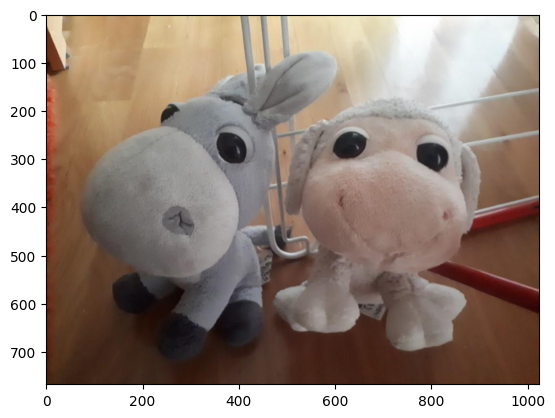

In [2]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/train/images/20181209_093257_jpg.rf.9e5de39c501d75369ffa14627baaa318.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [22]:
# Load pretrained weights
model = YOLO('yolov8l.pt')

In [23]:
# Freeze layers via callback
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

# Uncomment to freeze layers
# model.add_callback("on_train_start", freeze_layer)

In [24]:
# Train the model
train = model.train(data='./datasets/data.yaml', epochs=100, imgsz=1024)

Ultralytics YOLOv8.0.120 🚀 Python-3.8.5 torch-1.12.0 CUDA:0 (NVIDIA A100 80GB PCIe, 80995MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=./datasets/data.yaml, epochs=100, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

Freezing 5 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.2.m.1.cv1.conv.weight
freezing model.2.m.1.cv1.bn.weight
freezing model.2.m.1.cv1.bn.bias
freezing model.2.m.1.cv2.conv.weight
freezing model.2.m.1.cv2.bn.weight
freezing model.2.m.1.cv2.bn.bias
freezing model.2.m.2.cv1.conv.weight
freezing model.2.m.2.cv1.bn.weight
freezing model.2.m.2.cv1.bn.bias
freezing model.2.m.2.cv2.conv.weight
freezing model.2.m.2.cv2.bn.weight
freezing model.2.m.2.cv2.bn.bias
free

      1/100        12G     0.6321      3.109      1.239         36       1024: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.04it/s]
                   all          3          6      0.748      0.333      0.354      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
 

KeyboardInterrupt: 

In [25]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if file.split("train")[1]:
        number = int(file.split("train")[1])
        max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train21



image 1/1 /mnt/batch/tasks/shared/LS_root/mounts/clusters/a100/code/datasets/test/20181209_092837.jpg: 768x1024 12 osliks, 41 oveckas, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


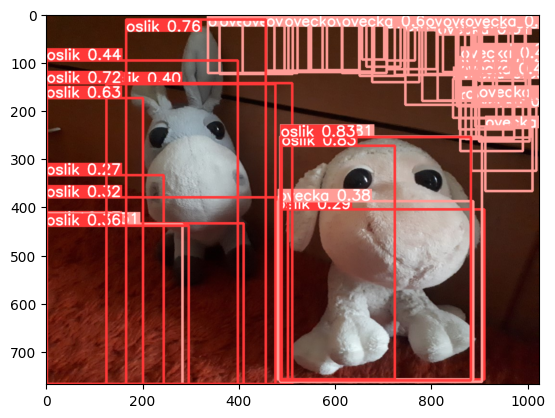

In [26]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /mnt/batch/tasks/shared/LS_root/mounts/clusters/a100/code/test2017/000000284881.jpg: 768x1024 12 osliks, 25 oveckas, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


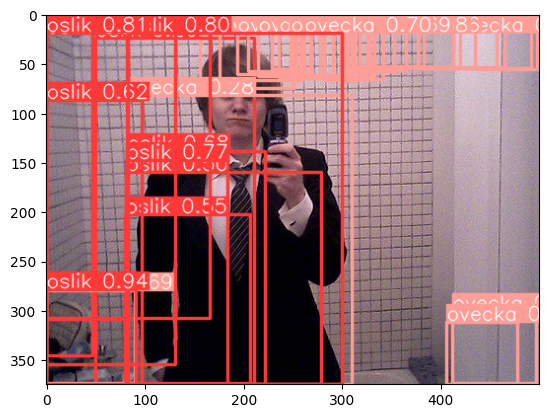

In [27]:
# Generic picture - we expect no objects to be found
results = best_model("./test2017/000000284881.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

## Fresh model from few data
Here we will use YOLOv8 with no pretraining and train on our very very small dataset. Can workout well for our extremly simple example, but in practice big high quality dataset will be needed to get good results.

Best for highly specialised visual tasks where transfer learning will not help, eg. medical images.

In [46]:
# Load empty model
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
# Train the model
train = model.train(data='./datasets/data.yaml', epochs=1000, patience=0, imgsz=1024)

In [1]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if file.split("train")[1]:
        number = int(file.split("train")[1])
        max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train16



image 1/1 /mnt/batch/tasks/shared/LS_root/mounts/clusters/a100/code/datasets/test/20181209_092837.jpg: 768x1024 1 oslik, 1 ovecka, 6.4ms
Speed: 1.3ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


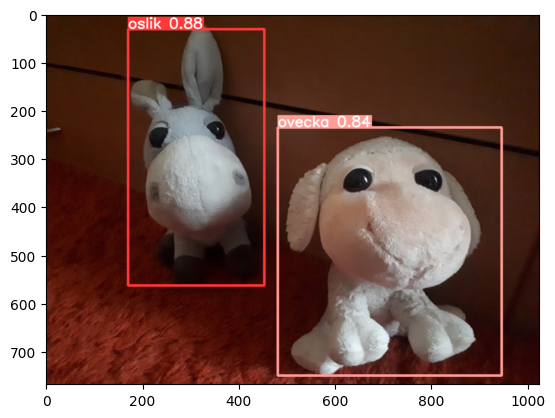

In [5]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [ ]:
# Generic picture
results = best_model("./test2017/000000284881.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

# Freezing layers

In [52]:
# Load empty model
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             


  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

In [53]:
# Freeze 100 layers via callback
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

model.add_callback("on_train_start", freeze_layer)

In [54]:
# Train the model
train = model.train(data='./datasets/data.yaml', epochs=3, imgsz=1024)

Ultralytics YOLOv8.0.120  Python-3.11.2 torch-2.0.1+cu117 CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=./datasets/data.yaml, epochs=3, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=

Freezing 10 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model

        1/3         0G      3.089      3.999      4.229         35       1024: 100%|██████████| 2/2 [00:23<00:00, 11.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]
                   all          3          6    0.00681          1     0.0107    0.00346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/3         0G      2.896       3.94      4.275         42       1024: 100%|██████████| 2/2 [00:26<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]
                   all          3          6    0.00678          1     0.0143    0.00404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/3         0G      2.898      3.797       4.23         35       1024: 100%|██████████| 2/2 [00:24<00:00, 12.09s/it]
                 